In [18]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Use 3 decimal places in output display
pd.set_option("display.precision", 3)

# Don't wrap repr(DataFrame) across additional lines
pd.set_option("display.expand_frame_repr", False)

# Set max rows displayed in output to 25
pd.set_option("display.max_rows", 25)

In [3]:
chatfile=r"C:\Users\surya\OneDrive\Documents\WhatsApp Chat with Sindhu Jr Rockwell.txt"

In [4]:
#regex pattern
pattern = r"(\d{1,2}\/\d{1,2}\/\d{2}),(\s\d{1,2}:\d{2})\s([AP]M)\s-\s([A-Za-z0-9\s]+):\s"

In [5]:
full_convo = re.split(pattern, open(chatfile,'r',encoding="utf-8").read())
full_convo_len = len(full_convo)

In [6]:
full_convo.pop(0)
full_convo_len -= 1

In [7]:
full_convo_len

4825

In [8]:
df = pd.DataFrame({"Date":[],
                   "Time":[],
                   "AMPM":[],
                   "User":[],
                   "Chat":[]})

In [9]:
# Filter Special Characters
def filter_chat(_string):
    temp = re.sub('[^A-Za-z0-9\s]+', '', _string)
    temp = temp.replace("\n","")
    temp = re.sub("\n|\t|\r","",temp)
    return temp

In [10]:
for i in range(int(full_convo_len/5)):
    df.loc[i] = [full_convo[5*i].strip(), full_convo[5*i+1].strip(), full_convo[5*i+2].strip(), full_convo[5*i+3].strip(), filter_chat(full_convo[5*i+4].strip()),]

In [11]:
df.head(13) # First Converstation

,Date,Time,AMPM,User,Chat
0,12/13/17,1:15,AM,Sindhu Jr Rockwell,Its a girl lifting weights
1,12/13/17,1:37,AM,Suryatej,
2,12/13/17,2:21,AM,Sindhu Jr Rockwell,
3,12/15/17,6:21,AM,Sindhu Jr Rockwell,
4,12/15/17,6:21,AM,Suryatej,Yeah I know My fav director
5,12/15/17,6:22,AM,Sindhu Jr Rockwell,Any plans of killing ur life heroines family m...
6,12/15/17,6:22,AM,Sindhu Jr Rockwell,
7,12/15/17,6:22,AM,Sindhu Jr Rockwell,
8,12/15/17,6:23,AM,Suryatej,
9,12/15/17,6:23,AM,Suryatej,I was thinking of hero perspective Protecting ...


In [13]:
# First Message by?
df.head(1)

,Date,Time,AMPM,User,Chat
0,12/13/17,1:15,AM,Sindhu Jr Rockwell,Its a girl lifting weights


In [14]:
msgs_by_user = dict(df.User.value_counts())

In [15]:
len(msgs_by_user.keys())

2

In [16]:
msgs_by_user

{'Sindhu Jr Rockwell': 556, 'Suryatej': 409}

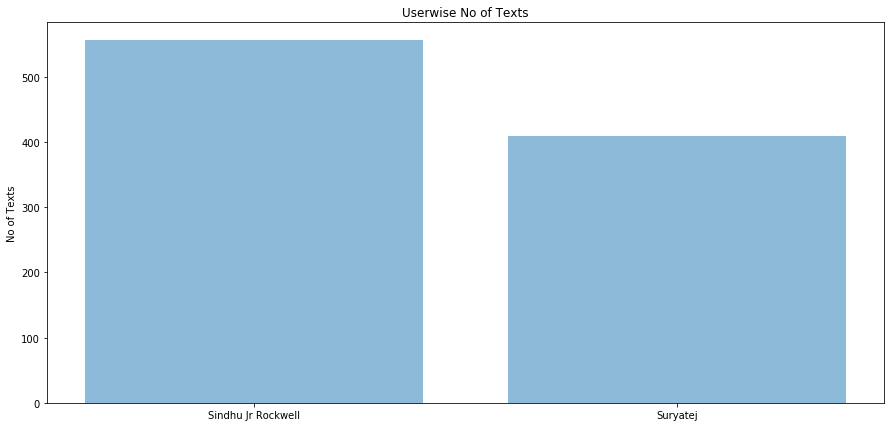

In [19]:
fig, ax = plt.subplots(figsize=(15,7))
y_pos = np.arange(len(msgs_by_user.keys()))
plt.bar(y_pos, list(msgs_by_user.values()), align='center', alpha=0.5)
plt.xticks(y_pos, list(msgs_by_user.keys()))
plt.ylabel('No of Texts')
plt.title('Userwise No of Texts')
plt.show()

In [20]:
df["Chat"].replace("Media omitted","", inplace=True) # skipping media content

In [21]:
from collections import Counter

def most_common_words(_dataframe, byuser=True):
    common_word_dict = {}
    if byuser==True:
        for users in msgs_by_user.keys():
            common_word_dict[users] = Counter()
            for _chat in [ i.lower().split() for i in df[df["User"]==users]["Chat"].values if i != ""]:
                common_word_dict[users].update(_chat)
            
    return common_word_dict
            

In [22]:
common_word_dict = most_common_words(df,True)

In [25]:
users = list(msgs_by_user.keys())
print ("{}\'s Most Commonly used words".format(users[0]))
common_word_dict[users[0]].most_common(25)

Sindhu Jr Rockwell's Most Commonly used words


[('i', 52),
 ('it', 39),
 ('you', 32),
 ('yeah', 30),
 ('the', 28),
 ('is', 27),
 ('a', 26),
 ('to', 24),
 ('for', 23),
 ('haha', 22),
 ('surya', 19),
 ('in', 19),
 ('so', 19),
 ('and', 18),
 ('ohh', 15),
 ('lo', 15),
 ('have', 14),
 ('no', 13),
 ('u', 12),
 ('thank', 11),
 ('ki', 11),
 ('ga', 11),
 ('all', 11),
 ('your', 11),
 ('na', 11)]

In [26]:
print ("{}\'s Most Commonly used words".format(users[1]))
common_word_dict[users[1]].most_common(25)

Suryatej's Most Commonly used words


[('i', 45),
 ('to', 37),
 ('the', 28),
 ('it', 27),
 ('for', 21),
 ('in', 21),
 ('u', 20),
 ('and', 16),
 ('will', 15),
 ('is', 15),
 ('ok', 15),
 ('so', 14),
 ('good', 14),
 ('sindhu', 14),
 ('of', 13),
 ('a', 13),
 ('or', 13),
 ('know', 12),
 ('you', 12),
 ('be', 12),
 ('me', 11),
 ('nenu', 11),
 ('was', 10),
 ('2', 10),
 ('can', 9)]

In [27]:
# Splitting Month/Date/Year
temp_df = pd.DataFrame({"Month":[],"Day":[],"Year":[]})
for index,row in df.iterrows():
    # print(row["Date"])
    temp_df.loc[index] = row["Date"].split("/")
    # print(temp_df.loc[index])

In [28]:
df["Day"] = temp_df["Day"] # adding the data back to main dataframe
df["Month"] = temp_df["Month"]
df["Year"] = temp_df["Year"]

In [29]:
df.head(5) # Blank Messages are mostly emoticons / Media files (like images) # have to write code to interpret them too

,Date,Time,AMPM,User,Chat,Day,Month,Year
0,12/13/17,1:15,AM,Sindhu Jr Rockwell,Its a girl lifting weights,13,12,17
1,12/13/17,1:37,AM,Suryatej,,13,12,17
2,12/13/17,2:21,AM,Sindhu Jr Rockwell,,13,12,17
3,12/15/17,6:21,AM,Sindhu Jr Rockwell,,15,12,17
4,12/15/17,6:21,AM,Suryatej,Yeah I know My fav director,15,12,17


In [30]:
df.Date.value_counts() # most chat convo days

7/14/19     102
10/25/18    100
11/25/18     77
11/22/19     59
11/15/19     58
           ... 
3/3/19        1
6/28/18       1
5/30/18       1
1/10/18       1
8/26/19       1
Name: Date, Length: 69, dtype: int64

In [31]:
df.groupby(['Year'])["Chat"].count() # No of Text based on year

Year
17     32
18    479
19    454
Name: Chat, dtype: int64

In [32]:
df.groupby(['Year'])["Month"].unique()

Year
17                                 [12]
18    [1, 3, 5, 6, 7, 8, 9, 10, 11, 12]
19           [1, 2, 3, 4, 7, 8, 11, 12]
Name: Month, dtype: object

In [33]:
df.groupby(['Year',"Month","Day"])["Chat"].count() # Chat based on Day, Month, Year

Year  Month  Day
17    12     13      3
             15     19
             18     10
18    1      10      1
             11      3
                    ..
19    7      31      3
      8      24      4
             26      1
             3       2
             9       3
Name: Chat, Length: 69, dtype: int64

In [174]:
import matplotlib.pyplot as plt

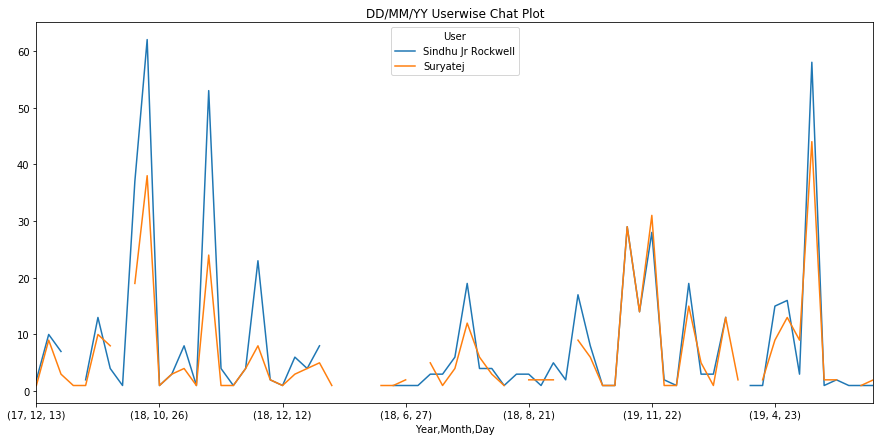

In [34]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title("DD/MM/YY Userwise Chat Plot")
df.groupby(['Year',"Month","Day","User"])["Chat"].count().unstack().plot(ax=ax) # Plot Based on userwise Chat info

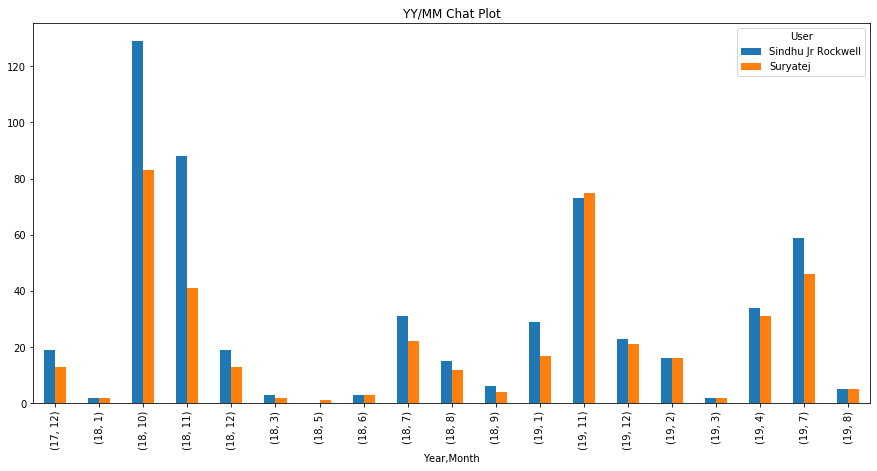

In [35]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title("YY/MM Chat Plot")
df.groupby(['Year',"Month","User"])["Chat"].count().unstack().plot(kind='bar',ax=ax)

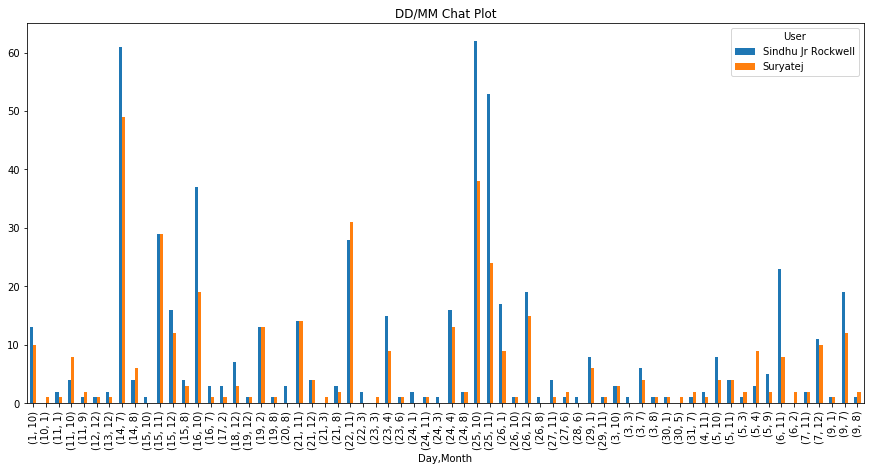

In [36]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title("DD/MM Chat Plot")
df.groupby(['Day',"Month","User"])["Chat"].count().unstack().plot(kind='bar',ax=ax)

In [37]:
# Most Converserd Month
df.groupby(['Year',"Month","User"])["Chat"].count()

Year  Month  User              
17    12     Sindhu Jr Rockwell     19
             Suryatej               13
18    1      Sindhu Jr Rockwell      2
             Suryatej                2
      10     Sindhu Jr Rockwell    129
                                  ... 
19    4      Suryatej               31
      7      Sindhu Jr Rockwell     59
             Suryatej               46
      8      Sindhu Jr Rockwell      5
             Suryatej                5
Name: Chat, Length: 37, dtype: int64

In [38]:
df.groupby(["Month","Day"])["User"].count()

Month  Day
1      10      1
       11      3
       24      2
       26     26
       29     14
              ..
8      26      1
       3       2
       9       3
9      11      3
       5       7
Name: User, Length: 66, dtype: int64

In [39]:
df.drop_duplicates(subset='Date', keep="first")["User"].value_counts() # No of Times A user initiated a Conversation

Suryatej              39
Sindhu Jr Rockwell    30
Name: User, dtype: int64

In [40]:
df.drop_duplicates(subset='Date', keep="last")["User"].value_counts() # No of Times A user ended a Conversation

Sindhu Jr Rockwell    48
Suryatej              21
Name: User, dtype: int64

Pretty much I initiate the Chat and You have ended it.

In [ ]:
def Birthday_first_wish_time(_dataframe):
    pass

In [ ]:
def Average_message_lenght_by_user(_dataframe):
    pass

In [ ]:
def most_commonly_used_emoticon(_dataframe):
    # Gives info on what kind of emotion user carries
    pass

In [ ]:
def average_reply_time(dataframe, include_Extremes=False):
    pass

In [ ]:
def most_time_spent_hour(dataframe):
    pass